In [85]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [86]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)


In [81]:
housing.YrSold.value_counts()

YrSold
2007    600
2009    585
2008    564
2006    516
2010    315
Name: count, dtype: int64

In [82]:
fig = px.scatter(housing, x='KitchenQual', 
                 y='SalePrice', 
                 color='SaleCondition',
                 title='Sale Price by Overall Quality and Sale Condition',
                 labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'},
                 category_orders={'OverallQual': sorted(housing['OverallQual'].unique())})
fig.show()

In [16]:
fig = px.scatter(housing, x='OverallQual', 
                 y='SalePrice', 
                 color='SaleCondition',
                 title='Sale Price by Overall Quality and Sale Condition',
                 labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'},
                 category_orders={'OverallQual': sorted(housing['OverallQual'].unique())})
fig.show()

In [28]:
fig = px.scatter(housing, x='GrLivArea', 
                 y='SalePrice', 
                 color='SaleCondition',
                 title='Sale Price by Overall Quality and Sale Condition',
                 labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'},
                 category_orders={'OverallQual': sorted(housing['OverallQual'].unique())})
fig.show()

In [74]:
neighborhood_size_means = housing.groupby('Neighborhood')['GrLivArea'].mean().sort_values()

# Convert the Series to a DataFrame
neighborhood_size_means 

Neighborhood
MeadowV    1078.058824
BrDale     1111.689655
Greens     1157.250000
Blueste    1159.700000
Sawyer     1187.007194
BrkSide    1237.932039
IDOTRR     1239.671053
NPkVill    1252.045455
NAmes      1287.126829
Mitchel    1303.192308
Edwards    1315.539394
Landmrk    1320.000000
GrnHill    1398.500000
Blmngtn    1418.000000
OldTown    1427.962441
CollgCr    1477.173729
SWISU      1590.000000
Somerst    1607.293706
SawyerW    1622.849558
Gilbert    1626.902098
NWAmes     1699.138211
Timber     1699.407407
Crawfor    1705.032258
ClearCr    1777.175000
Veenker    1790.000000
StoneBr    1841.720930
NridgHt    1920.471074
NoRidge    2452.925373
Name: GrLivArea, dtype: float64

In [78]:
neighborhood_quality_means = housing.groupby('Neighborhood')['OverallQual'].median().sort_values()

# Convert the Series to a DataFrame
neighborhood_quality_means 

Neighborhood
MeadowV    4.0
NAmes      5.0
Mitchel    5.0
SWISU      5.0
IDOTRR     5.0
Sawyer     5.0
Edwards    5.0
OldTown    5.0
BrkSide    5.0
Gilbert    6.0
NWAmes     6.0
ClearCr    6.0
Landmrk    6.0
BrDale     6.0
Blueste    6.0
NPkVill    6.0
Crawfor    6.0
SawyerW    6.0
Somerst    7.0
Blmngtn    7.0
Timber     7.0
GrnHill    7.0
CollgCr    7.0
Veenker    7.0
NoRidge    8.0
Greens     8.0
StoneBr    8.0
NridgHt    8.0
Name: OverallQual, dtype: float64

In [ ]:
neighborhood_age_means = housing.groupby('Neighborhood')['YearBuilt'].median().sort_values()


In [76]:
neighborhood_age_means = housing.groupby('Neighborhood')['YearBuilt'].median().sort_values()

# Convert the Series to a DataFrame
neighborhood_age_means 

Neighborhood
OldTown    1920.0
IDOTRR     1925.0
SWISU      1928.0
BrkSide    1930.0
Crawfor    1940.0
Edwards    1954.0
NAmes      1960.0
Sawyer     1965.0
ClearCr    1966.5
MeadowV    1972.0
BrDale     1972.0
NWAmes     1976.0
NPkVill    1976.0
Mitchel    1978.5
Veenker    1980.0
Greens     1980.0
Blueste    1980.0
GrnHill    1992.0
Landmrk    1993.0
SawyerW    1993.0
NoRidge    1995.0
Gilbert    1999.0
CollgCr    2001.0
StoneBr    2001.0
Timber     2001.0
NridgHt    2005.0
Somerst    2005.0
Blmngtn    2005.0
Name: YearBuilt, dtype: float64

In [51]:
neighborhood_saleprice_means = housing.groupby('Neighborhood')['SalePrice'].mean()

# Convert the Series to a DataFrame
neighborhood_saleprice_means = neighborhood_saleprice_means.reset_index()

# Rename the columns for better clarity
neighborhood_saleprice_means.columns = ['Neighborhood', 'MeanSalePrice']

# Sort the DataFrame by 'MeanSalePrice' in descending order
neighborhood_saleprice_means = neighborhood_saleprice_means.sort_values(by='MeanSalePrice', ascending=False)

# Print the resulting DataFrame
neighborhood_saleprice_means.Neighborhood

18    NoRidge
19    NridgHt
25    StoneBr
10    GrnHill
27    Veenker
26     Timber
24    Somerst
4     ClearCr
6     Crawfor
5     CollgCr
0     Blmngtn
9      Greens
17     NWAmes
8     Gilbert
23    SawyerW
14    Mitchel
15      NAmes
1     Blueste
16    NPkVill
22     Sawyer
12    Landmrk
21      SWISU
7     Edwards
20    OldTown
3     BrkSide
11     IDOTRR
2      BrDale
13    MeadowV
Name: Neighborhood, dtype: object

In [58]:
housing.Neighborhood.value_counts()

Neighborhood
11    410
18    236
4     213
5     165
21    143
14    143
8     139
15    123
26    121
13    113
12    104
3     103
19     92
2      76
27     67
22     54
25     43
6      42
20     40
0      34
1      29
17     23
23     23
9      22
10     10
16      8
24      2
7       1
Name: count, dtype: int64

In [52]:
housing.Neighborhood.replace({'NoRidge' : 27,
 'NridgHt' :26,
 'StoneBr':25,
 'GrnHill':24,
 'Veenker':23,
 'Timber':22,
 'Somerst':21,
 'ClearCr':20,
 'Crawfor':19,
 'CollgCr':18,
 'Blmngtn':17,
 'Greens':16,
 'NWAmes':15,
 'Gilbert':14,
 'SawyerW':13,
 'Mitchel':12,
 'NAmes':11,
 'Blueste':10,
 'NPkVill':9,
 'Sawyer':8,
 'Landmrk':7,
 'SWISU':6,
 'Edwards':5,
 'OldTown':4,
 'BrkSide':3,
 'IDOTRR':2,
 'BrDale':1,
 'MeadowV':0}, inplace=True)

In [87]:
fig_scatter = px.scatter(housing, x='Neighborhood', y='GrLivArea', color='OverallQual')
fig_scatter.show()

In [97]:
fig_scatter = px.scatter(housing, x='Neighborhood', y='SalePrice', color='OverallQual')
fig_scatter.show()

In [53]:
fig = px.box(housing, x='Neighborhood', y='SalePrice', points="all", ,
             title='Sale Price by Overall Quality and Sale Condition',
             labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'})

fig.show()

In [27]:
fig = px.box(housing, x='OverallQual', y='SalePrice', points="all",
             title='Sale Price by Overall Quality and Sale Condition',
             labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'})
fig_scatter = px.scatter(housing, x='OverallQual', y='SalePrice', color='SaleCondition')
fig.add_trace(fig_scatter.data[1])
fig.add_trace(fig_scatter.data[2])
fig.add_trace(fig_scatter.data[3])
fig.add_trace(fig_scatter.data[4])
fig.add_trace(fig_scatter.data[5])
fig.show()

In [18]:
# Create the scatter plot
fig = px.scatter(housing, x='PoolArea', y='SalePrice', title='Sale Price vs. Garage Year Built',
                 labels={'PoolArea': 'Pool Area', 'SalePrice': 'Sale Price'})

# Show the plot
fig.show()

In [88]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# reset index so there is only one number associated with each house
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

#Convert some numerical variables to categorical 
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']

housing[converted_features] = housing[converted_features].fillna(0)

missing_categorical_none = ['MasVnrType', 'GarageType', 'Fence', 'MiscFeature']  

housing[missing_categorical_none] = housing[missing_categorical_none].fillna('None')

housing.Electrical = housing.Electrical.fillna('SBrkr')

missing_numerical = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                'GarageCars', 'GarageArea']
housing[missing_numerical] = housing[missing_numerical].fillna(0)

proportion = (housing.LotFrontage/housing.LotArea).mean()

housing.LotFrontage.fillna((housing.LotArea * proportion), inplace=True)

f = lambda x: 'yes' if x>0 else 'no'
housing.PoolArea = housing.PoolArea.map(f)

housing = housing.rename(columns={"PoolArea": "PoolYN"})

housing['GarageYN'] = housing.GarageYrBlt
housing.GarageYN = housing.GarageYN.fillna(0)

housing.GarageYN = housing.GarageYN.map(f)

housing = housing.drop(['GarageYrBlt'], axis = 1).copy()

In [89]:
housing['Bathrooms'] = housing.BsmtFullBath + housing.BsmtHalfBath + housing.FullBath + housing.HalfBath

In [63]:
# this did not help
#housing['TotalSFBuilt'] = housing.TotalBsmtSF + housing.GarageArea + housing.GrLivArea + housing.WoodDeckSF + housing.OpenPorchSF + housing.EnclosedPorch + housing['3SsnPorch'] + housing.ScreenPorch

In [70]:
# this also did not help
# housing['TotalSFInside'] = housing.TotalBsmtSF + housing.GrLivArea

In [90]:
fig = px.scatter(housing, x='OverallQual', 
                 y='SalePrice', 
                 color='SaleCondition',
                 title='Sale Price by Overall Quality and Sale Condition',
                 labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'},
                 category_orders={'OverallQual': sorted(housing['OverallQual'].unique())})
fig.show()

In [31]:
fig = px.scatter(housing, x='KitchenQual', 
                 y='SalePrice', 
                 color='SaleCondition',
                 title='Sale Price by Overall Quality and Sale Condition',
                 labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'},
                 category_orders={'OverallQual': sorted(housing['OverallQual'].unique())})
fig.show()

In [80]:
housing.to_csv('housing_pp3.csv')

<Axes: xlabel='GarageCars'>

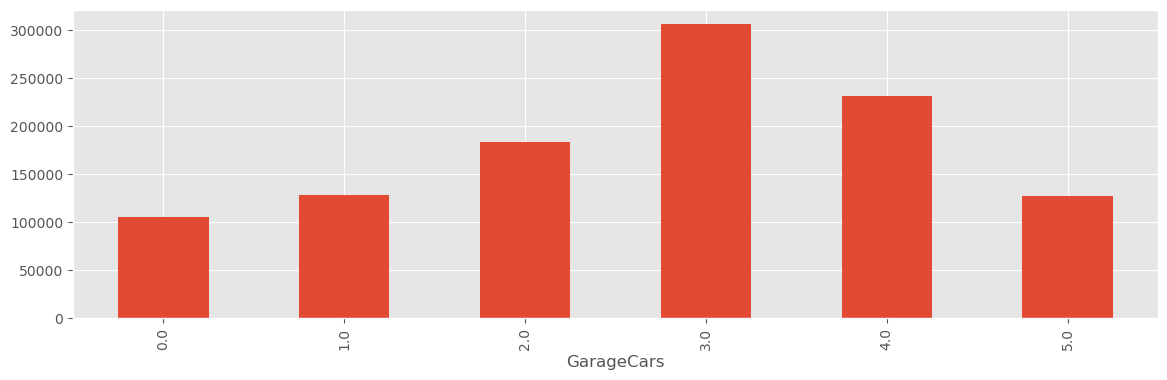

In [95]:
housing.groupby(['GarageCars']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

<Axes: xlabel='OverallQual'>

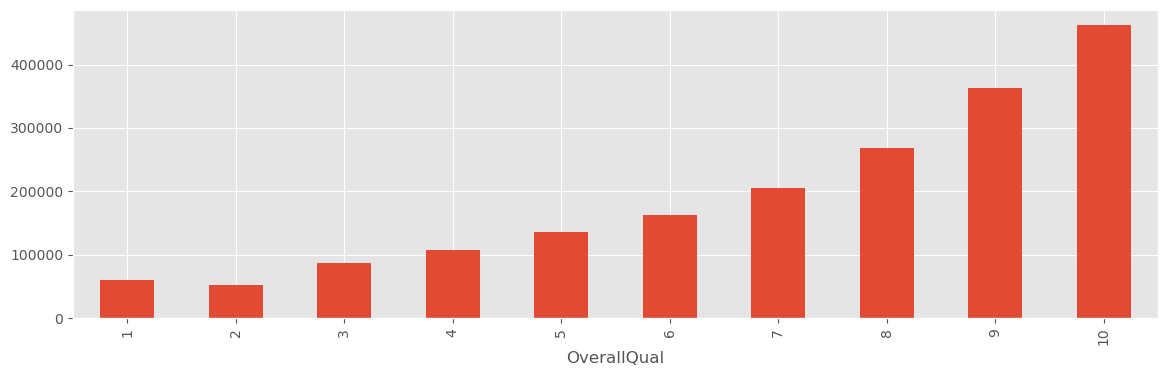

In [94]:
housing.groupby(['OverallQual']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

In [92]:
fig = px.box(housing, x='OverallQual', y='SalePrice', points="all",
             title='Sale Price by Overall Quality and Sale Condition',
             labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price'})

fig.show()

<Axes: xlabel='ExterQual'>

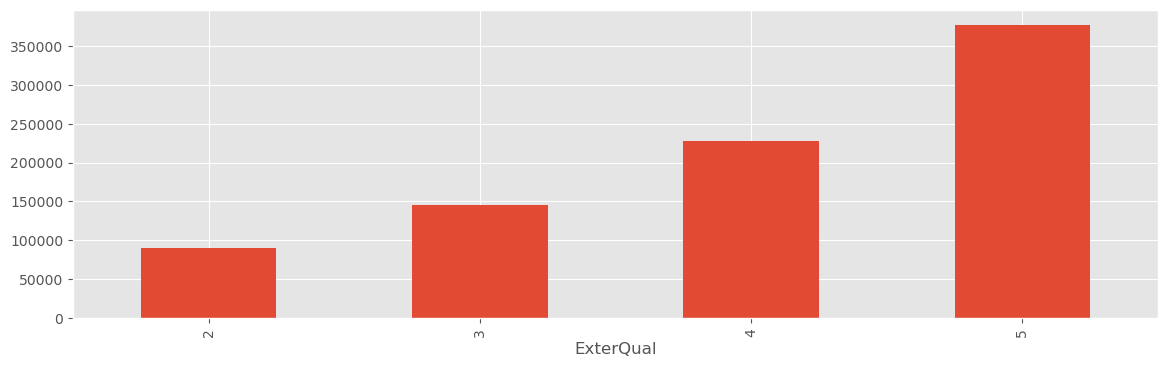

In [93]:
housing.groupby(['ExterQual']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

In [95]:
fig = px.box(housing, x='ExterQual', y='SalePrice', points="all",
             title='Sale Price by External Quality and Sale Condition',
             labels={'ExterQual': 'External Quality', 'SalePrice': 'Sale Price'})

fig.show()

<Axes: xlabel='KitchenQual'>

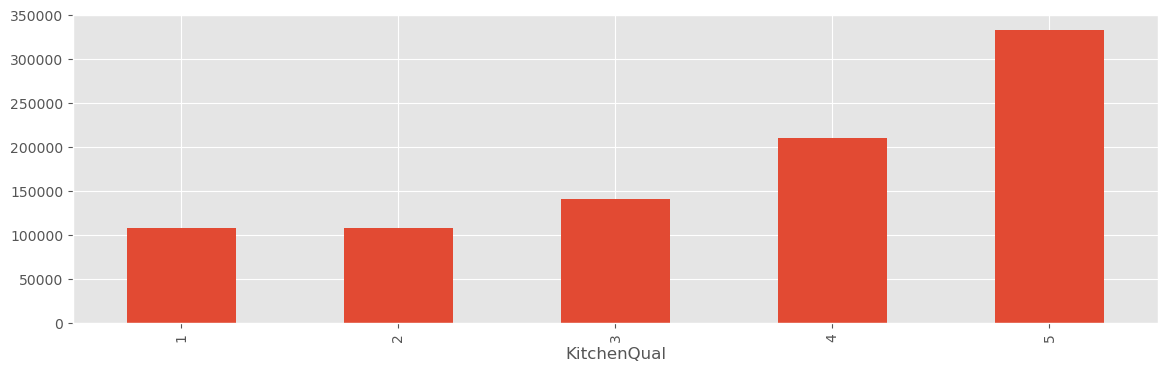

In [92]:
housing.groupby(['KitchenQual']).SalePrice.mean().plot(kind='bar', figsize=(14,4))

In [78]:
housing.MiscFeature.value_counts()

MiscFeature
None    2482
Shed      88
Gar2       5
Othr       3
TenC       1
Name: count, dtype: int64

In [89]:
housing = housing.drop(['MiscFeature'], axis =1).copy()

In [81]:
index_names_normal = housing[housing['SaleCondition'] != 'Normal'].index
housing.drop(index_names_normal, inplace = True)

In [82]:
housing.to_csv('housing_pp4.csv')

In [90]:
index_names_ab_par = housing[(housing['SaleCondition'] == 'Family') | 
                               (housing['SaleCondition'] == 'AdjLand') |
                               (housing['SaleCondition'] == 'Alloca')].index
housing.drop(index_names_ab_par, inplace = True)

In [91]:
housing.to_csv('housing_pp5.csv')

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 94.2% of the points

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 95.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.6% of the points

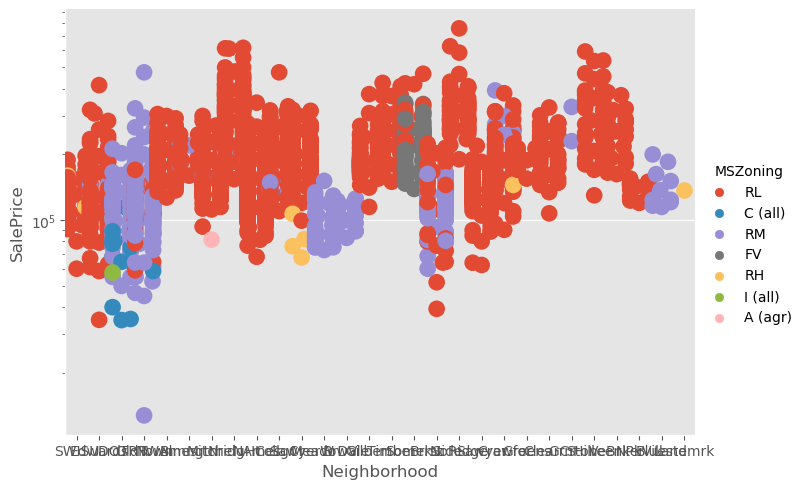

In [98]:
fig = sns.catplot(x='Neighborhood', y='SalePrice', hue='MSZoning', data=housing, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points

C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Natal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


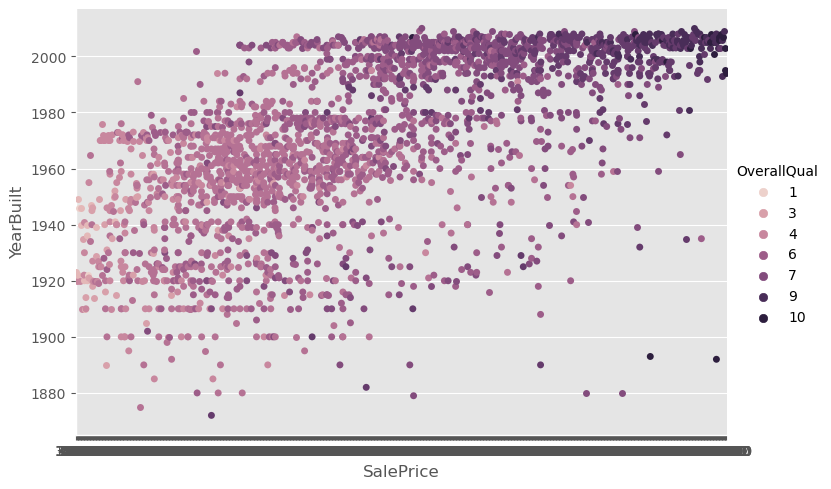

In [106]:
fig = sns.catplot(x='SalePrice', y='YearBuilt', hue='OverallQual', data=housing, kind='swarm', size=5, aspect=1.5)
ax = fig.axes[0][0]